## Imports

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading The Dataset

In [35]:
ds3 = pd.read_csv('dataset3.csv')
ds3

,COUNTY,HOSPITAL,LINKS TO COMMENT LETTERS,ESOPHAGEAL RESECTION (Risk-Adjusted Mortality Rate),ESOPHAGEAL RESECTION (# of Deaths),ESOPHAGEAL RESECTION (# of Cases),ESOPHAGEAL RESECTION (Outlier Ratings),PANCREATIC RESECTION (Risk-Adjusted Mortality Rate),PANCREATIC RESECTION (# of Deaths),PANCREATIC RESECTION (# of Cases),...,PNEUMONIA (# of Cases),PNEUMONIA (Outlier Ratings),PCI (Risk-Adjusted Mortality Rate),PCI (# of Deaths),PCI (# of Cases),PCI (Outlier Ratings),CAROTID ENDARTERECTOMY (Risk-Adjusted Mortality Rate),CAROTID ENDARTERECTOMY (# of Deaths),CAROTID ENDARTERECTOMY (# of Cases),CAROTID ENDARTERECTOMY (Outlier Ratings)
0,Alameda,Alameda County Medical Center - Highland Campus,NaN,.,.,.,NaN,.,.,.,...,212,NaN,.,.,.,NaN,0,0,3,NaN
1,Alameda,Alameda Hospital,NaN,.,.,.,NaN,.,.,.,...,150,NaN,.,.,.,NaN,0,0,3,NaN
2,Alameda,Alta Bates Summit Medical Center - Alta Bates ...,NaN,.,.,.,NaN,.,.,.,...,245,NaN,2.6,5,95,NaN,6.9,1,13,NaN
3,Alameda,Alta Bates Summit Medical Center - Summit Camp...,NaN,0,0,3,NaN,0,0,3,...,371,NaN,2.9,19,792,NaN,7.2,1,21,NaN
4,Alameda,Eden Medical Center,NaN,.,.,.,NaN,.,.,.,...,195,NaN,.,.,.,NaN,0,0,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Ventura,Thousand Oaks Surgical Hospital,NaN,.,.,.,NaN,.,.,.,...,.,NaN,.,.,.,NaN,.,.,.,NaN
327,Ventura,Ventura County Medical Center,NaN,.,.,.,NaN,.,.,.,...,146,NaN,.,.,.,NaN,.,.,.,NaN
328,Yolo,Sutter Davis Hospital,NaN,.,.,.,NaN,.,.,.,...,97,NaN,.,.,.,NaN,.,.,.,NaN
329,Yolo,Woodland Memorial Hospital,NaN,.,.,.,NaN,.,.,.,...,108,NaN,.,.,.,NaN,0,0,18,NaN


# Preprocessing

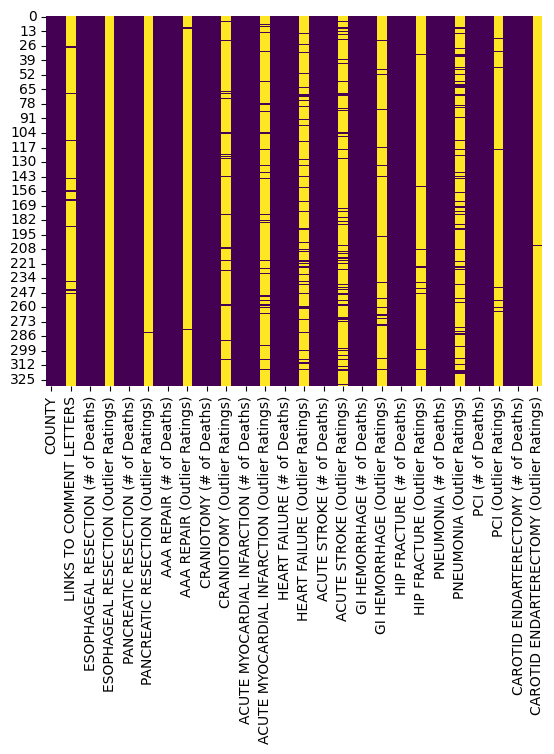

In [36]:
sns.heatmap(ds3.isnull(), cbar=False, cmap='viridis')
plt.show()

In [37]:
total_rows = len(ds3)
((ds3.isnull().sum() / total_rows) * 100).sort_values(ascending = False).to_frame().head(17)


,0
ESOPHAGEAL RESECTION (Outlier Ratings),100.000000
CAROTID ENDARTERECTOMY (Outlier Ratings),99.697885
PANCREATIC RESECTION (Outlier Ratings),99.697885
AAA REPAIR (Outlier Ratings),99.395770
PCI (Outlier Ratings),97.583082
HIP FRACTURE (Outlier Ratings),97.280967
LINKS TO COMMENT LETTERS,96.676737
GI HEMORRHAGE (Outlier Ratings),95.166163
CRANIOTOMY (Outlier Ratings),94.864048
ACUTE MYOCARDIAL INFARCTION (Outlier Ratings),92.145015


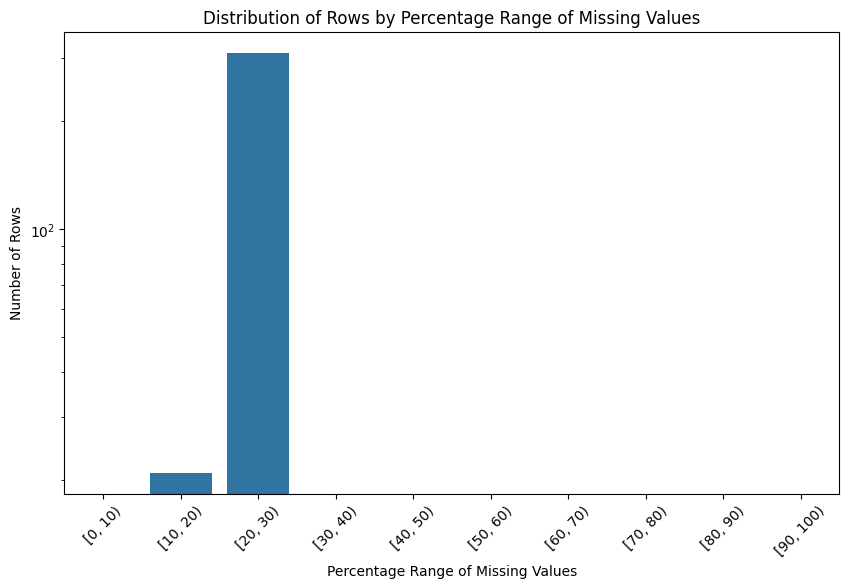

In [38]:
num_columns = len(ds3.columns)
row_missing_values_percentage = (ds3.isnull().sum(axis=1) / num_columns) * 100

bins = np.arange(0, 101, 10)
categories = pd.cut(row_missing_values_percentage, bins, right=False, include_lowest=True)
category_counts = categories.value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index.astype(str), y=category_counts.values)
plt.xlabel('Percentage Range of Missing Values')
plt.ylabel('Number of Rows')
plt.title('Distribution of Rows by Percentage Range of Missing Values')
plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

In [39]:
# Calculate the percentage of missing values per column and per row
column_missing_values_percentage = (ds3.isnull().sum() / len(ds3)) * 100
row_missing_values_percentage = (ds3.isnull().sum(axis=1) / len(ds3.columns)) * 100

# Sort columns and rows by the percentage of missing values in descending order
sorted_columns_by_missing = column_missing_values_percentage.sort_values(ascending=False)
sorted_rows_by_missing = row_missing_values_percentage.sort_values(ascending=False)

# Determine a threshold for cutting off columns and rows with the highest missing values.
# We'll look at the distribution to decide on the threshold.
column_threshold = sorted_columns_by_missing[sorted_columns_by_missing > 50].count()
row_threshold = sorted_rows_by_missing[sorted_rows_by_missing > 50].count()

# Now we will cut off the columns and rows above the 50% threshold of missing values
columns_to_remove = sorted_columns_by_missing.index[:column_threshold]
rows_to_remove = sorted_rows_by_missing.index[:row_threshold]

# Create a mask for the dataset without the columns with the highest missing values
column_mask = ds3.columns.difference(columns_to_remove)

# Apply the mask to remove the columns
dataset_reduced_columns = ds3[column_mask]

# Remove the rows with the highest missing values
ds3_preprocessed = dataset_reduced_columns.drop(index=rows_to_remove).reset_index(drop=True)

f"shape of the original dataset `ds3` {ds3.shape}. shape of the preprocessed dataset `ds3_preprocessed` {ds3_preprocessed.shape}"

'shape of the original dataset `ds3` (331, 51). shape of the preprocessed dataset `ds3_preprocessed` (331, 38)'

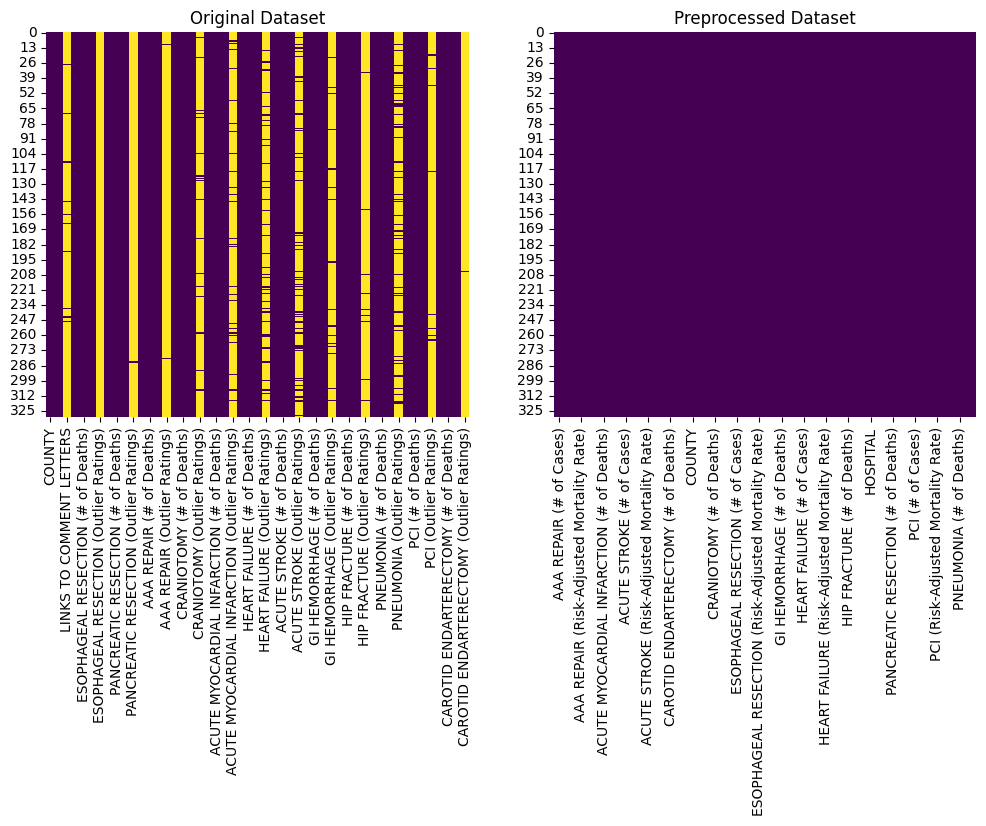

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(ds3.isnull(), cbar=False, cmap='viridis', ax=ax[0])
ax[0].set_title('Original Dataset')

sns.heatmap(ds3_preprocessed.isnull(), cbar=False, cmap='viridis', ax=ax[1])
ax[1].set_title('Preprocessed Dataset')

plt.show()

### Reducing NaN (missing) values

In [41]:
missing_val = ds3.copy()
threshold = 0.5  # Example: 50% threshold

# Dropping columns with missing value rate higher than threshold
missing_val = missing_val[missing_val.columns[missing_val.isnull().mean() < threshold]]
missing_val.head(3330)

,COUNTY,HOSPITAL,ESOPHAGEAL RESECTION (Risk-Adjusted Mortality Rate),ESOPHAGEAL RESECTION (# of Deaths),ESOPHAGEAL RESECTION (# of Cases),PANCREATIC RESECTION (Risk-Adjusted Mortality Rate),PANCREATIC RESECTION (# of Deaths),PANCREATIC RESECTION (# of Cases),AAA REPAIR (Risk-Adjusted Mortality Rate),AAA REPAIR (# of Deaths),...,HIP FRACTURE (# of Cases),PNEUMONIA (Risk-Adjusted Mortality Rate),PNEUMONIA (# of Deaths),PNEUMONIA (# of Cases),PCI (Risk-Adjusted Mortality Rate),PCI (# of Deaths),PCI (# of Cases),CAROTID ENDARTERECTOMY (Risk-Adjusted Mortality Rate),CAROTID ENDARTERECTOMY (# of Deaths),CAROTID ENDARTERECTOMY (# of Cases)
0,Alameda,Alameda County Medical Center - Highland Campus,.,.,.,.,.,.,.,.,...,13,5.7,4,212,.,.,.,0,0,3
1,Alameda,Alameda Hospital,.,.,.,.,.,.,.,.,...,43,1.9,4,150,.,.,.,0,0,3
2,Alameda,Alta Bates Summit Medical Center - Alta Bates ...,.,.,.,.,.,.,.,.,...,104,3.3,8,245,2.6,5,95,6.9,1,13
3,Alameda,Alta Bates Summit Medical Center - Summit Camp...,0,0,3,0,0,3,0,0,...,103,2.4,10,371,2.9,19,792,7.2,1,21
4,Alameda,Eden Medical Center,.,.,.,.,.,.,.,.,...,66,3.4,8,195,.,.,.,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Ventura,Thousand Oaks Surgical Hospital,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
327,Ventura,Ventura County Medical Center,.,.,.,.,.,.,.,.,...,37,5.6,6,146,.,.,.,.,.,.
328,Yolo,Sutter Davis Hospital,.,.,.,.,.,.,.,.,...,52,5.5,5,97,.,.,.,.,.,.
329,Yolo,Woodland Memorial Hospital,.,.,.,.,.,.,.,.,...,52,1.9,3,108,.,.,.,0,0,18


## Split numerical and categorical data

In [42]:
# Corrected lists of numerical and categorical columns
numerical_cols = [
    'ESOPHAGEAL RESECTION (Risk-Adjusted Mortality Rate)',
    'ESOPHAGEAL RESECTION (# of Deaths)',
    'ESOPHAGEAL RESECTION (# of Cases)',
    'PANCREATIC RESECTION (Risk-Adjusted Mortality Rate)',
    'PANCREATIC RESECTION (# of Deaths)',
    'PANCREATIC RESECTION (# of Cases)',
    'AAA REPAIR (Risk-Adjusted Mortality Rate)',
    'AAA REPAIR (# of Deaths)',
    'AAA REPAIR (# of Cases)',
    'CRANIOTOMY (Risk-Adjusted Mortality Rate)',
    'CRANIOTOMY (# of Deaths)',
    'CRANIOTOMY (# of Cases)',
    'ACUTE MYOCARDIAL INFARCTION (Risk-Adjusted Mortality Rate)',
    'ACUTE MYOCARDIAL INFARCTION (# of Deaths)',
    'ACUTE MYOCARDIAL INFARCTION (# of Cases)',
    'HEART FAILURE (Risk-Adjusted Mortality Rate)',
    'HEART FAILURE (# of Deaths)',
    'HEART FAILURE (# of Cases)',
    'ACUTE STROKE (Risk-Adjusted Mortality Rate)',
    'ACUTE STROKE (# of Deaths)',
    'ACUTE STROKE (# of Cases)',
    'GI HEMORRHAGE (Risk-Adjusted Mortality Rate)',
    'GI HEMORRHAGE (# of Deaths)',
    'GI HEMORRHAGE (# of Cases)',
    'HIP FRACTURE (Risk-Adjusted Mortality Rate)',
    'HIP FRACTURE (# of Deaths)',
    'HIP FRACTURE (# of Cases)',
    'PNEUMONIA (Risk-Adjusted Mortality Rate)',
    'PNEUMONIA (# of Deaths)',
    'PNEUMONIA (# of Cases)',
    'PCI (Risk-Adjusted Mortality Rate)',
    'PCI (# of Deaths)',
    'PCI (# of Cases)',
    'CAROTID ENDARTERECTOMY (Risk-Adjusted Mortality Rate)',
    'CAROTID ENDARTERECTOMY (# of Deaths)',
    'CAROTID ENDARTERECTOMY (# of Cases)'
]

categorical_cols = [
    'ESOPHAGEAL RESECTION (Outlier Ratings)',
    'PANCREATIC RESECTION (Outlier Ratings)',
    'AAA REPAIR (Outlier Ratings)',
    'CRANIOTOMY (Outlier Ratings)',
    'ACUTE MYOCARDIAL INFARCTION (Outlier Ratings)',
    'HEART FAILURE (Outlier Ratings)',
    'ACUTE STROKE (Outlier Ratings)',
    'GI HEMORRHAGE (Outlier Ratings)',
    'HIP FRACTURE (Outlier Ratings)',
    'PNEUMONIA (Outlier Ratings)',
    'PCI (Outlier Ratings)',
    'CAROTID ENDARTERECTOMY (Outlier Ratings)'
]

# Separate the dataset into numerical and categorical dataframes
numerical_data = ds3[numerical_cols]
categorical_data = ds3[categorical_cols]


## Numerical Data

In [43]:
numerical_data.head(300)

,ESOPHAGEAL RESECTION (Risk-Adjusted Mortality Rate),ESOPHAGEAL RESECTION (# of Deaths),ESOPHAGEAL RESECTION (# of Cases),PANCREATIC RESECTION (Risk-Adjusted Mortality Rate),PANCREATIC RESECTION (# of Deaths),PANCREATIC RESECTION (# of Cases),AAA REPAIR (Risk-Adjusted Mortality Rate),AAA REPAIR (# of Deaths),AAA REPAIR (# of Cases),CRANIOTOMY (Risk-Adjusted Mortality Rate),...,HIP FRACTURE (# of Cases),PNEUMONIA (Risk-Adjusted Mortality Rate),PNEUMONIA (# of Deaths),PNEUMONIA (# of Cases),PCI (Risk-Adjusted Mortality Rate),PCI (# of Deaths),PCI (# of Cases),CAROTID ENDARTERECTOMY (Risk-Adjusted Mortality Rate),CAROTID ENDARTERECTOMY (# of Deaths),CAROTID ENDARTERECTOMY (# of Cases)
0,.,.,.,.,.,.,.,.,.,9.8,...,13,5.7,4,212,.,.,.,0,0,3
1,.,.,.,.,.,.,.,.,.,.,...,43,1.9,4,150,.,.,.,0,0,3
2,.,.,.,.,.,.,.,.,.,5.7,...,104,3.3,8,245,2.6,5,95,6.9,1,13
3,0,0,3,0,0,3,0,0,6,41.7,...,103,2.4,10,371,2.9,19,792,7.2,1,21
4,.,.,.,.,.,.,.,.,.,2.4,...,66,3.4,8,195,.,.,.,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,.,.,.,.,.,.,.,.,.,.,...,68,0.9,4,304,1.6,4,239,0,0,44
296,.,.,.,.,.,.,.,.,.,.,...,25,6.6,6,128,.,.,.,0,0,5
297,.,.,.,.,.,.,.,.,.,.,...,12,8.2,4,60,.,.,.,0,0,6
298,.,.,.,.,.,.,4.6,1,15,.,...,90,3.5,14,377,.,.,.,0,0,28


### Variance

In [44]:
# Converting columns that should be numeric to numeric data types
for col in numerical_data:
        # Replace non-numeric characters with NaN and convert to numeric
        numerical_data[col] = pd.to_numeric(numerical_data[col], errors='coerce')
# Recalculating variance for all columns now treated as numeric
variance_of_all_numeric_columns = numerical_data.var(numeric_only=True)
# Displaying the variance of all numeric columns
variance_of_all_numeric_columns.to_frame()

/var/folders/k7/l12gv7vs54qdb289q4nh4z840000gn/T/ipykernel_24016/2314884769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data[col] = pd.to_numeric(numerical_data[col], errors='coerce')


,0
ESOPHAGEAL RESECTION (Risk-Adjusted Mortality Rate),62.495256
ESOPHAGEAL RESECTION (# of Deaths),0.294872
ESOPHAGEAL RESECTION (# of Cases),80.327564
PANCREATIC RESECTION (Risk-Adjusted Mortality Rate),210.486181
PANCREATIC RESECTION (# of Deaths),0.365079
PANCREATIC RESECTION (# of Cases),120.789683
AAA REPAIR (Risk-Adjusted Mortality Rate),89.825639
AAA REPAIR (# of Deaths),0.223582
AAA REPAIR (# of Cases),167.894328
CRANIOTOMY (Risk-Adjusted Mortality Rate),79.103429


### Feature Scaling
 Standardization or Min-Max scaling can be applied to normalize the data.

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)
# Convert back to DataFrame
numerical_data_scaled = pd.DataFrame(numerical_data_scaled, columns=numerical_cols)
numerical_data_scaled

,ESOPHAGEAL RESECTION (Risk-Adjusted Mortality Rate),ESOPHAGEAL RESECTION (# of Deaths),ESOPHAGEAL RESECTION (# of Cases),PANCREATIC RESECTION (Risk-Adjusted Mortality Rate),PANCREATIC RESECTION (# of Deaths),PANCREATIC RESECTION (# of Cases),AAA REPAIR (Risk-Adjusted Mortality Rate),AAA REPAIR (# of Deaths),AAA REPAIR (# of Cases),CRANIOTOMY (Risk-Adjusted Mortality Rate),...,HIP FRACTURE (# of Cases),PNEUMONIA (Risk-Adjusted Mortality Rate),PNEUMONIA (# of Deaths),PNEUMONIA (# of Cases),PCI (Risk-Adjusted Mortality Rate),PCI (# of Deaths),PCI (# of Cases),CAROTID ENDARTERECTOMY (Risk-Adjusted Mortality Rate),CAROTID ENDARTERECTOMY (# of Deaths),CAROTID ENDARTERECTOMY (# of Cases)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.216013,...,-1.043537,0.372703,-0.701961,-0.106969,NaN,NaN,NaN,-0.248167,-0.424229,-1.076257
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.588552,-0.750452,-0.701961,-0.500837,NaN,NaN,NaN,-0.248167,-0.424229,-1.076257
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.246526,...,0.336584,-0.336658,-0.189170,0.102670,0.528113,-0.316289,-0.789524,3.019558,2.198278,-0.728693
3,-0.387525,-0.466252,-0.601707,-0.394469,-0.625543,-0.670611,-0.231906,-0.501085,-0.873411,3.814793,...,0.321418,-0.602669,0.067226,0.903111,0.802068,2.216553,1.496658,3.161633,2.198278,-0.450641
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.618814,...,-0.239730,-0.307102,-0.189170,-0.214965,NaN,NaN,NaN,-0.248167,-0.424229,-0.937231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614912,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.201400,...,-0.679549,0.343146,-0.445565,-0.526248,NaN,NaN,NaN,NaN,NaN,NaN
328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.452056,0.313590,-0.573763,-0.837531,NaN,NaN,NaN,NaN,NaN,NaN
329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.452056,-0.750452,-0.830159,-0.767651,NaN,NaN,NaN,-0.248167,-0.424229,-0.554910


### Normalize Data

In [49]:
numericalclone = numerical_data.copy()
# Converting columns that should be numeric to numeric data types
for col in numericalclone:
        # Replace non-numeric characters with NaN and convert to numeric
        numericalclone[col] = pd.to_numeric(numericalclone[col], errors='coerce')
# from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_numnormalized = scaler.fit_transform(numericalclone)
pd.DataFrame(data_numnormalized)
numericalclone

,ESOPHAGEAL RESECTION (Risk-Adjusted Mortality Rate),ESOPHAGEAL RESECTION (# of Deaths),ESOPHAGEAL RESECTION (# of Cases),PANCREATIC RESECTION (Risk-Adjusted Mortality Rate),PANCREATIC RESECTION (# of Deaths),PANCREATIC RESECTION (# of Cases),AAA REPAIR (Risk-Adjusted Mortality Rate),AAA REPAIR (# of Deaths),AAA REPAIR (# of Cases),CRANIOTOMY (Risk-Adjusted Mortality Rate),...,HIP FRACTURE (# of Cases),PNEUMONIA (Risk-Adjusted Mortality Rate),PNEUMONIA (# of Deaths),PNEUMONIA (# of Cases),PCI (Risk-Adjusted Mortality Rate),PCI (# of Deaths),PCI (# of Cases),CAROTID ENDARTERECTOMY (Risk-Adjusted Mortality Rate),CAROTID ENDARTERECTOMY (# of Deaths),CAROTID ENDARTERECTOMY (# of Cases)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.8,...,13.0,5.7,4.0,212.0,NaN,NaN,NaN,0.0,0.0,3.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.0,1.9,4.0,150.0,NaN,NaN,NaN,0.0,0.0,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,...,104.0,3.3,8.0,245.0,2.6,5.0,95.0,6.9,1.0,13.0
3,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,6.0,41.7,...,103.0,2.4,10.0,371.0,2.9,19.0,792.0,7.2,1.0,21.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,...,66.0,3.4,8.0,195.0,NaN,NaN,NaN,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.1,...,37.0,5.6,6.0,146.0,NaN,NaN,NaN,NaN,NaN,NaN
328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.0,5.5,5.0,97.0,NaN,NaN,NaN,NaN,NaN,NaN
329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.0,1.9,3.0,108.0,NaN,NaN,NaN,0.0,0.0,18.0


### Feature Selection or Dimensionality Reduction
KNN can be negatively affected by irrelevant features or very high-dimensional data.

In [50]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA

# Iterative imputation
iterative_imputer = IterativeImputer()
data_imputed = iterative_imputer.fit_transform(data_numnormalized)

# Apply PCA after imputation
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_imputed)
data_reduced

/usr/local/lib/python3.11/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


array([[-2.07490991e+00,  9.98306068e-01],
       [-2.03192672e+00,  1.32351251e-01],
       [ 4.30487326e-01,  1.75982601e-02],
       [ 3.64576731e+00,  1.27745327e+00],
       [ 4.72816374e-01, -1.29026818e+00],
       [ 3.26123982e+00, -2.29643301e+00],
       [ 2.11028793e+00, -1.05439708e+00],
       [-1.39516347e+00,  1.98674122e-01],
       [-1.60780563e+00, -9.80740276e-01],
       [-4.03810449e-01,  8.89485713e-01],
       [ 2.45646819e+00,  4.70366779e+00],
       [-2.54374453e+00, -6.41414984e-01],
       [-4.26312003e+00,  4.97564707e+00],
       [ 4.03515102e+00,  1.54563810e-01],
       [-1.70171726e+00, -2.19303778e+00],
       [-5.88233478e-01, -1.50931139e+00],
       [-3.40276900e+00,  2.22658609e+00],
       [-3.72802348e+00,  8.09829946e-01],
       [-2.22079132e+00, -8.35741040e-01],
       [-2.93845097e-01,  3.30101284e+00],
       [ 1.78243786e+00,  7.63273609e-03],
       [ 3.52489618e+00, -7.75912502e-01],
       [-4.07401138e-01, -6.30209666e-01],
       [ 3.

###  Outlier Detection and Handling
Outliers can be handled by various methods like trimming or capping.

In [51]:
from scipy import stats

# Removing outliers (example using Z-score)
z_scores = np.abs(stats.zscore(numerical_data_scaled))
numerical_data_no_outliers = numerical_data_scaled[(z_scores < 3).all(axis=1)]
numerical_data_no_outliers

,ESOPHAGEAL RESECTION (Risk-Adjusted Mortality Rate),ESOPHAGEAL RESECTION (# of Deaths),ESOPHAGEAL RESECTION (# of Cases),PANCREATIC RESECTION (Risk-Adjusted Mortality Rate),PANCREATIC RESECTION (# of Deaths),PANCREATIC RESECTION (# of Cases),AAA REPAIR (Risk-Adjusted Mortality Rate),AAA REPAIR (# of Deaths),AAA REPAIR (# of Cases),CRANIOTOMY (Risk-Adjusted Mortality Rate),...,HIP FRACTURE (# of Cases),PNEUMONIA (Risk-Adjusted Mortality Rate),PNEUMONIA (# of Deaths),PNEUMONIA (# of Cases),PCI (Risk-Adjusted Mortality Rate),PCI (# of Deaths),PCI (# of Cases),CAROTID ENDARTERECTOMY (Risk-Adjusted Mortality Rate),CAROTID ENDARTERECTOMY (# of Deaths),CAROTID ENDARTERECTOMY (# of Cases)


## Categorical Data

In [52]:
categorical_data.head(70)

,ESOPHAGEAL RESECTION (Outlier Ratings),PANCREATIC RESECTION (Outlier Ratings),AAA REPAIR (Outlier Ratings),CRANIOTOMY (Outlier Ratings),ACUTE MYOCARDIAL INFARCTION (Outlier Ratings),HEART FAILURE (Outlier Ratings),ACUTE STROKE (Outlier Ratings),GI HEMORRHAGE (Outlier Ratings),HIP FRACTURE (Outlier Ratings),PNEUMONIA (Outlier Ratings),PCI (Outlier Ratings),CAROTID ENDARTERECTOMY (Outlier Ratings)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Better,NaN,NaN,Better,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,Worse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Entropy

In [53]:
def calculate_entropy(column):
    """Calculate the entropy of a categorical series."""
    proportions = column.value_counts(normalize=True)
    entropy = -np.sum(proportions * np.log2(proportions))
    return entropy

# Calculate category frequencies for each categorical feature
category_frequencies = categorical_data.apply(lambda x: x.value_counts(normalize=True))

# Calculate the number of unique categories for each feature
unique_categories_count = categorical_data.nunique()

# Calculate entropy for each categorical feature
entropy = categorical_data.apply(calculate_entropy)

# Combining all measures into a single DataFrame
categorical_variability = pd.DataFrame({
    'Unique Categories': unique_categories_count,
    'Entropy': entropy
})

categorical_variability

,Unique Categories,Entropy
ESOPHAGEAL RESECTION (Outlier Ratings),0,-0.000000
PANCREATIC RESECTION (Outlier Ratings),1,-0.000000
AAA REPAIR (Outlier Ratings),1,-0.000000
CRANIOTOMY (Outlier Ratings),2,0.977418
ACUTE MYOCARDIAL INFARCTION (Outlier Ratings),2,0.890492
HEART FAILURE (Outlier Ratings),2,0.999526
ACUTE STROKE (Outlier Ratings),2,0.983939
GI HEMORRHAGE (Outlier Ratings),2,0.811278
HIP FRACTURE (Outlier Ratings),2,0.764205
PNEUMONIA (Outlier Ratings),2,0.998636


###  Handle Categorical Features
If your dataset includes categorical features need to be encoded. One-hot encoding is a common approach.

In [54]:
hotone = pd.get_dummies(categorical_data)
hotone

,ESOPHAGEAL RESECTION (Outlier Ratings),PANCREATIC RESECTION (Outlier Ratings)_Worse,AAA REPAIR (Outlier Ratings)_Worse,CRANIOTOMY (Outlier Ratings)_Better,CRANIOTOMY (Outlier Ratings)_Worse,ACUTE MYOCARDIAL INFARCTION (Outlier Ratings)_Better,ACUTE MYOCARDIAL INFARCTION (Outlier Ratings)_Worse,HEART FAILURE (Outlier Ratings)_Better,HEART FAILURE (Outlier Ratings)_Worse,ACUTE STROKE (Outlier Ratings)_Better,ACUTE STROKE (Outlier Ratings)_Worse,GI HEMORRHAGE (Outlier Ratings)_Better,GI HEMORRHAGE (Outlier Ratings)_Worse,HIP FRACTURE (Outlier Ratings)_Better,HIP FRACTURE (Outlier Ratings)_Worse,PNEUMONIA (Outlier Ratings)_Better,PNEUMONIA (Outlier Ratings)_Worse,PCI (Outlier Ratings)_Better,PCI (Outlier Ratings)_Worse,CAROTID ENDARTERECTOMY (Outlier Ratings)_Worse
0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,NaN,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
327,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
328,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
329,NaN,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


### Normalize Data

In [55]:
categoricalclone = categorical_data.copy()
# Converting columns that should be numeric to numeric data types
for col in categoricalclone:
        # Replace non-numeric characters with NaN and convert to numeric
        categoricalclone[col] = pd.to_numeric(categoricalclone[col], errors='coerce')
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_normalized = scaler.fit_transform(categoricalclone)
data_normalized

/usr/local/lib/python3.11/site-packages/sklearn/utils/extmath.py:1108: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/site-packages/sklearn/utils/extmath.py:1113: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/site-packages/sklearn/utils/extmath.py:1133: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

### Feature Selection or Dimensionality Reduction
KNN can be negatively affected by irrelevant features or very high-dimensional data.

In [56]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA

# Iterative imputation
iterative_imputer = IterativeImputer()
data_imputed = iterative_imputer.fit_transform(data_numnormalized)

# Apply PCA after imputation
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_imputed)
data_reduced


/usr/local/lib/python3.11/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


array([[-2.07490991e+00,  9.98306068e-01],
       [-2.03192672e+00,  1.32351251e-01],
       [ 4.30487326e-01,  1.75982601e-02],
       [ 3.64576731e+00,  1.27745327e+00],
       [ 4.72816374e-01, -1.29026818e+00],
       [ 3.26123982e+00, -2.29643301e+00],
       [ 2.11028793e+00, -1.05439708e+00],
       [-1.39516347e+00,  1.98674122e-01],
       [-1.60780563e+00, -9.80740276e-01],
       [-4.03810449e-01,  8.89485713e-01],
       [ 2.45646819e+00,  4.70366779e+00],
       [-2.54374453e+00, -6.41414984e-01],
       [-4.26312003e+00,  4.97564707e+00],
       [ 4.03515102e+00,  1.54563810e-01],
       [-1.70171726e+00, -2.19303778e+00],
       [-5.88233478e-01, -1.50931139e+00],
       [-3.40276900e+00,  2.22658609e+00],
       [-3.72802348e+00,  8.09829946e-01],
       [-2.22079132e+00, -8.35741040e-01],
       [-2.93845097e-01,  3.30101284e+00],
       [ 1.78243786e+00,  7.63273609e-03],
       [ 3.52489618e+00, -7.75912502e-01],
       [-4.07401138e-01, -6.30209666e-01],
       [ 3.

### Split the Data 
If you have labels and you want to train and evaluate the KNN model, split the data into training and test sets.

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data_normalized, test_size=0.2, random_state=42)